<a href="https://colab.research.google.com/github/shrishatuladhar/AI-ML/blob/main/2332330_ShrishaTuladhar_MovieReviewClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NAME: SHRISHA TULADHAR**

**UNI ID: 2332330**

**MOVIE REVIEW CLASSIFICATION**

IMPORTS

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

**LOADING DATASET**

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/movie_review_text_classification/train_movie_review.csv')
val_df = pd.read_csv('/content/drive/MyDrive/movie_review_text_classification/val_movie_review.csv')
test_df = pd.read_csv('/content/drive/MyDrive/movie_review_text_classification/test_movie_review.csv')


## ***3.1 TEXT PREPROCESSING, TOKENIZATION AND SEQUENCE PADDING ***

In [ ]:
# Check the first few rows of each dataset
print("TRAIN DATA:")
display(train_df.head())
print("\nVALIDATION DATA:")
display(val_df.head())
print("\nTEST DATA:")
display(test_df.head())

# Check dataset shapes
print(f"\nTrain shape: {train_df.shape}")
print(f"Validation shape: {val_df.shape}")
print(f"Test shape: {test_df.shape}")

TRAIN DATA:


,Unnamed: 0,review,sentiment
0,3774,"Having avoided seeing the movie in the cinema,...",0
1,48396,With this movie I was really hoping that the i...,0
2,1980,Raymond Burr stars as an attorney caught up in...,0
3,6703,A lot people get hung up on this films tag as ...,1
4,28168,I was a fan of Buffy and hoped it would come t...,0



VALIDATION DATA:


,Unnamed: 0,review,sentiment
0,30825,"A genuinely odd, surreal jumble of visual idea...",0
1,42564,"""The Snow Queen"" is based on the famous and ve...",0
2,16498,The quintessential Georgian film of Georgi Dan...,1
3,6597,I'm a huge comedy show fan. Racial humor is al...,0
4,39137,Pretty good film from Preminger; labyrinthine ...,1



TEST DATA:


,Unnamed: 0,review,sentiment
0,33553,I really liked this Summerslam due to the look...,1
1,9427,Not many television shows appeal to quite as m...,1
2,199,The film quickly gets to a major chase scene w...,0
3,12447,Jane Austen would definitely approve of this o...,1
4,39489,Expectations were somewhat high for me when I ...,0



Train shape: (35000, 3)
Validation shape: (5000, 3)
Test shape: (10000, 3)


In [ ]:
# Check column names and data types
print("Train columns:")
print(train_df.info())

# Check for missing values
print("\nMissing values in train:", train_df.isnull().sum())
print("Missing values in validation:", val_df.isnull().sum())
print("Missing values in test:", test_df.isnull().sum())

Train columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35000 entries, 0 to 34999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  35000 non-null  int64 
 1   review      35000 non-null  object
 2   sentiment   35000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 820.4+ KB
None

Missing values in train: Unnamed: 0    0
review        0
sentiment     0
dtype: int64
Missing values in validation: Unnamed: 0    0
review        0
sentiment     0
dtype: int64
Missing values in test: Unnamed: 0    0
review        0
sentiment     0
dtype: int64


In [ ]:
print(train_df.columns)
print(val_df.columns)
print(test_df.columns)

Index(['Unnamed: 0', 'review', 'sentiment'], dtype='object')
Index(['Unnamed: 0', 'review', 'sentiment'], dtype='object')
Index(['Unnamed: 0', 'review', 'sentiment'], dtype='object')


**CLEAN DATASET**

**TOKENISATION**

In [ ]:
# Initialize NLP tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Text cleaning function
def clean_text(text):
    # Lowercase
    text = text.lower()

    # Remove URLs, mentions, hashtags, numbers, and special chars
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'@\w+|#\w+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Handle contractions
    contractions = {
        "don't": "do not", "can't": "cannot", "won't": "will not",
        "it's": "it is", "i'm": "i am", "you're": "you are",
        "they're": "they are", "we're": "we are", "that's": "that is"
    }
    for contraction, expansion in contractions.items():
        text = text.replace(contraction, expansion)

    # Remove stopwords and lemmatize
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

# Apply cleaning
train_df['cleaned_text'] = train_df['review'].apply(clean_text)
val_df['cleaned_text'] = val_df['review'].apply(clean_text)
test_df['cleaned_text'] = test_df['review'].apply(clean_text)

# Verify
print("Original:", train_df['review'].iloc[0])
print("Cleaned:", train_df['cleaned_text'].iloc[0])

Original: Having avoided seeing the movie in the cinema, but buying the DVD for my wife for Xmas, I had to watch it. I did not expect much, which usually means I get more than I bargained for. But 'Mamma Mia' - utter, utter cr**. I like ABBA, I like the songs, I have the old LPs. But this film is just terrible. The stage show looks like a bit of a musical, but this races along with songs hurriedly following one another, no characterisation, the dance numbers (which were heavily choreographed according to the extras on the DVD) are just thrown away with only half the bodies ever on screen, the dance chorus of north Europeans appear on a small Greek island at will, while the set and set up of numbers would have disgraced Cliff Richard's musicals in the sixties!Meryl (see me I'm acting)Streep can't even make her usual mugging effective in an over-the-top musical! Her grand piece - 'The Winner Takes It All' - is Meryl at the Met! Note to director - it should have been shot in stillness wit

**VISUALIZE CLEAN DATA**

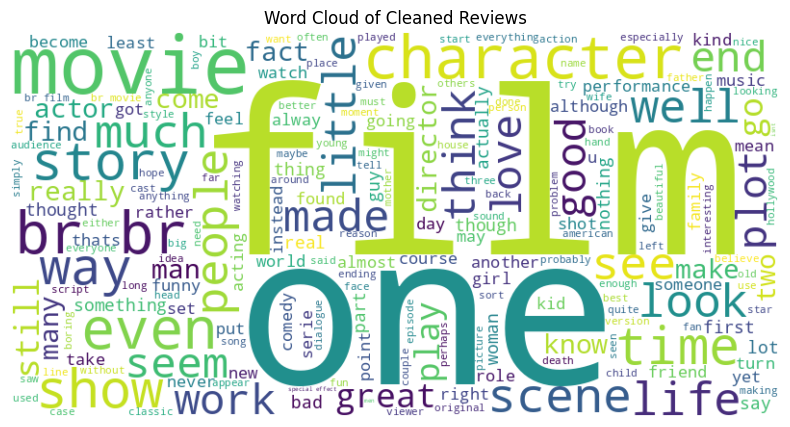

In [ ]:
all_text = ' '.join(train_df['cleaned_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Cleaned Reviews')
plt.show()

**MOST FREQUENT WORDS**

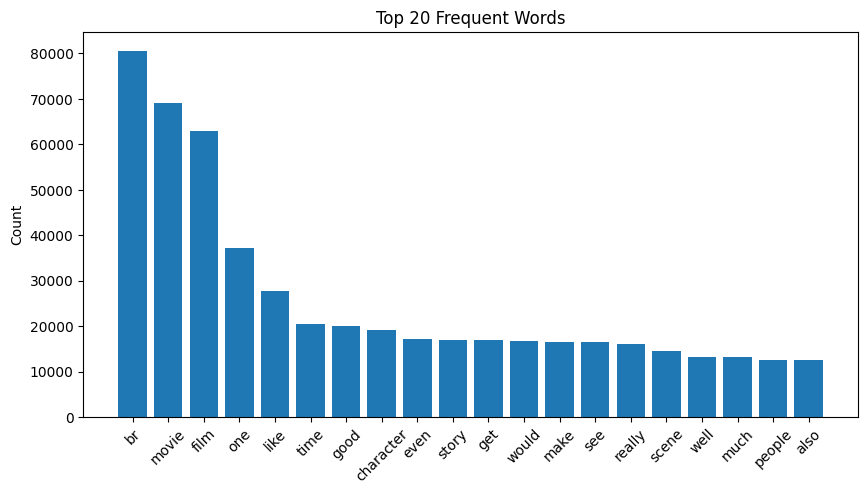

In [ ]:
from collections import Counter
words = all_text.split()
word_counts = Counter(words).most_common(20)

plt.figure(figsize=(10, 5))
plt.bar([word[0] for word in word_counts], [word[1] for word in word_counts])
plt.xticks(rotation=45)
plt.title('Top 20 Frequent Words')
plt.ylabel('Count')
plt.show()

**TOKENIZING AND PADDING**

In [ ]:
# Initialize Tokenizer (fit ONLY on training data)
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(train_df['cleaned_text'])  # Train on training text only

# Convert all splits to sequences
X_train_seq = tokenizer.texts_to_sequences(train_df['cleaned_text'])
X_val_seq = tokenizer.texts_to_sequences(val_df['cleaned_text'])
X_test_seq = tokenizer.texts_to_sequences(test_df['cleaned_text'])
print("Training sample sequence:", X_train_seq[0])

Training sample sequence: [4069, 213, 3, 334, 2479, 173, 222, 1, 35, 401, 19, 498, 178, 12, 1, 1, 9297, 1783, 1783, 1, 6, 1, 6, 247, 83, 1, 4, 282, 738, 26, 44, 6, 118, 489, 1084, 240, 247, 1, 794, 5, 74, 6256, 662, 381, 2297, 5272, 1655, 921, 173, 1121, 151, 253, 433, 50, 192, 662, 4800, 2002, 1584, 821, 308, 2555, 775, 131, 131, 381, 13, 1, 3468, 4673, 489, 1, 15, 62, 1, 86, 10, 14, 548, 9298, 1027, 2188, 489, 1592, 238, 1958, 51, 4610, 1620, 655, 65, 136, 1, 267, 3270, 616, 3049, 1711, 3636, 4995, 1009, 292, 1, 1927, 202, 267, 447, 425, 618, 6, 23, 4216, 5, 42, 3570, 259, 126, 4217, 9, 10, 345, 7637, 238, 1, 324, 3553, 1, 4, 2059, 47, 3206, 173, 2537, 2653, 3271, 84, 1, 16, 3786, 2059, 505, 2432, 1, 160]


 Padding (Percentile-Based Uniform Length)

In [ ]:
# Calculate 95th percentile of training sequence lengths (avoid outliers)
train_seq_lengths = [len(seq) for seq in X_train_seq]
max_len = int(np.percentile(train_seq_lengths, 95))  # Adjust percentile if needed

# Pad all splits to max_len
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_val_pad = pad_sequences(X_val_seq, maxlen=max_len, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')

print(f"\nPadded sequences to length (95th percentile): {max_len}")
print("Padded training sample:", X_train_pad[0])


Padded sequences to length (95th percentile): 312
Padded training sample: [4069  213    3  334 2479  173  222    1   35  401   19  498  178   12
    1    1 9297 1783 1783    1    6    1    6  247   83    1    4  282
  738   26   44    6  118  489 1084  240  247    1  794    5   74 6256
  662  381 2297 5272 1655  921  173 1121  151  253  433   50  192  662
 4800 2002 1584  821  308 2555  775  131  131  381   13    1 3468 4673
  489    1   15   62    1   86   10   14  548 9298 1027 2188  489 1592
  238 1958   51 4610 1620  655   65  136    1  267 3270  616 3049 1711
 3636 4995 1009  292    1 1927  202  267  447  425  618    6   23 4216
    5   42 3570  259  126 4217    9   10  345 7637  238    1  324 3553
    1    4 2059   47 3206  173 2537 2653 3271   84    1   16 3786 2059
  505 2432    1  160    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
  

Label Preparation (if needed)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode labels (e.g., 'positive'=1, 'negative'=0)
le = LabelEncoder()
y_train = le.fit_transform(train_df['sentiment'])
y_val = le.transform(val_df['sentiment'])
y_test = le.transform(test_df['sentiment'])

# Verify
print("\nLabel mapping:", dict(zip(le.classes_, le.transform(le.classes_))))


Label mapping: {0: 0, 1: 1}


In [ ]:
print("\nShapes:")
print(f"Train: {X_train_pad.shape}, Labels: {y_train.shape}")
print(f"Validation: {X_val_pad.shape}, Labels: {y_val.shape}")
print(f"Test: {X_test_pad.shape}, Labels: {y_test.shape}")


Shapes:
Train: (35000, 312), Labels: (35000,)
Validation: (5000, 312), Labels: (5000,)
Test: (10000, 312), Labels: (10000,)


In [ ]:
# Print label mapping (critical for interpretation)
print("\nLabel Mapping:")
if hasattr(le, 'classes_'):
    for i, class_name in enumerate(le.classes_):
        print(f"{class_name} → {i}")
else:
    print("Labels are already numeric (no encoding was needed)")


Label Mapping:
0 → 0
1 → 1


In [ ]:
print("Original labels (first 5):", train_df['sentiment'].head())

Original labels (first 5): 0    0
1    0
2    0
3    1
4    0
Name: sentiment, dtype: int64


In [ ]:
print("Unique raw labels:", train_df['sentiment'].unique())

Unique raw labels: [0 1]


## **3.2 MODEL BUILDING AND TRAINING**

In [ ]:
!pip install gensim python-Levenshtein
!python -m gensim.downloader --download word2vec-google-news-300

2025-05-10 10:56:06,850 : __main__ : INFO : Data has been installed and data path is /root/gensim-data/word2vec-google-news-300/word2vec-google-news-300.gz


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense
from tensorflow.keras.initializers import Constant
import numpy as np
import gensim.downloader as api

# Ensure these are defined from preprocessing
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 128

In [ ]:
model1 = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim),  # Removed input_length
    SimpleRNN(64),
    Dense(1, activation='sigmoid')
])
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Build model explicitly to see summary
model1.build(input_shape=(None, max_len))  # max_len from your padding step
model1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 312, 128)       │    17,084,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 64)             │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,096,449 (65.22 MB)

 Trainable params: 17,096,449 (65.22 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model2 = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim),
    LSTM(64),
    Dense(1, activation='sigmoid')
])
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.build(input_shape=(None, max_len))
model2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 312, 128)       │    17,084,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,133,505 (65.36 MB)

 Trainable params: 17,133,505 (65.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.initializers import Constant
import numpy as np
import gensim.downloader as api  # Ensure this is imported

# 3. LSTM with Word2Vec Embeddings
try:
    word2vec = api.load('word2vec-google-news-300')

    # Create embedding matrix
    embedding_matrix = np.zeros((vocab_size, 300))
    for word, i in tokenizer.word_index.items():
        if i < vocab_size and word in word2vec:
            embedding_matrix[i] = word2vec[word]

    model3 = Sequential([
        Embedding(
            input_dim=vocab_size,
            output_dim=300,  # Must match Word2Vec dimension
            input_length=max_len,
            embeddings_initializer=Constant(embedding_matrix)
        ),
        LSTM(64),
        Dense(1, activation='sigmoid')
    ])
    model3.layers[0].trainable = False  # Freeze embeddings

except Exception as e:
    print(f"Word2Vec failed: {e}\nUsing random embeddings instead.")
    model3 = Sequential([
        Embedding(vocab_size, embedding_dim, input_length=max_len),
        LSTM(64),
        Dense(1, activation='sigmoid')
    ])
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model3.build(input_shape=(None, max_len))
model3.summary()



Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ (None, 312, 300)       │    40,040,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        93,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,134,205 (153.10 MB)

 Trainable params: 93,505 (365.25 KB)

 Non-trainable params: 40,040,700 (152.74 MB)

## **Train Model 1 (SimpleRNN)**

In [ ]:
history1 = model1.fit(
    X_train_pad, y_train,
    validation_data=(X_val_pad, y_val),
    epochs=10,  # Can adjust
    batch_size=64,
    verbose=1
)

Epoch 1/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 21s 31ms/step - accuracy: 0.5052 - loss: 0.6954 - val_accuracy: 0.5090 - val_loss: 0.6987
Epoch 2/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - accuracy: 0.5079 - loss: 0.6941 - val_accuracy: 0.4958 - val_loss: 0.6946
Epoch 3/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.5225 - loss: 0.6801 - val_accuracy: 0.4954 - val_loss: 0.7015
Epoch 4/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.5333 - loss: 0.6608 - val_accuracy: 0.4938 - val_loss: 0.7249
Epoch 5/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.5313 - loss: 0.6600 - val_accuracy: 0.4956 - val_loss: 0.7182
Epoch 6/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - accuracy: 0.5260 - loss: 0.6590 - val_accuracy: 0.4958 - val_loss: 0.7250
Epoch 7/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - accuracy: 0.5322 - loss: 0.6593 - val_accuracy: 0.4930 - val_loss: 0.7368
Epoch 8/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.5268 - loss: 0.6565 - 

## **Train Model 2 (LSTM)**

In [ ]:
history2 = model2.fit(
    X_train_pad, y_train,
    validation_data=(X_val_pad, y_val),
    epochs=10,
    batch_size=64,
    verbose=1
)

Epoch 1/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.4969 - loss: 0.6938 - val_accuracy: 0.5088 - val_loss: 0.6916
Epoch 2/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.5166 - loss: 0.6879 - val_accuracy: 0.5004 - val_loss: 0.6915
Epoch 3/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.5241 - loss: 0.6663 - val_accuracy: 0.5168 - val_loss: 0.7097
Epoch 4/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.5377 - loss: 0.6708 - val_accuracy: 0.6788 - val_loss: 0.6662
Epoch 5/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.7425 - loss: 0.5592 - val_accuracy: 0.8240 - val_loss: 0.4546
Epoch 6/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.8669 - loss: 0.3581 - val_accuracy: 0.8704 - val_loss: 0.3234
Epoch 7/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.9218 - loss: 0.2250 - val_accuracy: 0.8750 - val_loss: 0.3242
Epoch 8/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 22s 26ms/step - accuracy: 0.9516 - loss: 0.1539 - 

## **Train Model 3 (LSTM + Word2Vec)**

In [ ]:
history3 = model3.fit(
    X_train_pad, y_train,
    validation_data=(X_val_pad, y_val),
    epochs=10,
    batch_size=64,
    verbose=1
)

Epoch 1/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.5022 - loss: 0.6939 - val_accuracy: 0.5012 - val_loss: 0.6925
Epoch 2/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.5334 - loss: 0.6864 - val_accuracy: 0.4936 - val_loss: 0.6939
Epoch 3/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.5069 - loss: 0.6924 - val_accuracy: 0.5102 - val_loss: 0.6927
Epoch 4/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.5098 - loss: 0.6908 - val_accuracy: 0.4942 - val_loss: 0.6952
Epoch 5/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.5217 - loss: 0.6881 - val_accuracy: 0.6446 - val_loss: 0.6439
Epoch 6/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.5961 - loss: 0.6567 - val_accuracy: 0.4958 - val_loss: 0.6927
Epoch 7/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.5052 - loss: 0.6914 - val_accuracy: 0.5162 - val_loss: 0.6908
Epoch 8/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.5206 - loss: 0.6857 - val_a

**EVALUATION**

In [ ]:
# Compare validation accuracy
print("\nMax Validation Accuracy:")
print(f"SimpleRNN: {max(history1.history['val_accuracy']):.4f}")
print(f"LSTM: {max(history2.history['val_accuracy']):.4f}")
print(f"LSTM+Word2Vec: {max(history3.history['val_accuracy']):.4f}")

# Test set evaluation
def evaluate_model(model, X_test, y_test):
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"Test Accuracy: {accuracy:.4f}")
    return accuracy

print("\nTest Set Performance:")
test_acc1 = evaluate_model(model1, X_test_pad, y_test)
test_acc2 = evaluate_model(model2, X_test_pad, y_test)
test_acc3 = evaluate_model(model3, X_test_pad, y_test)



Max Validation Accuracy:
SimpleRNN: 0.5090
LSTM: 0.8750
LSTM+Word2Vec: 0.8578

Test Set Performance:
Test Accuracy: 0.5019
Test Accuracy: 0.8695
Test Accuracy: 0.8609


**TRAIN VS VALIDATION**

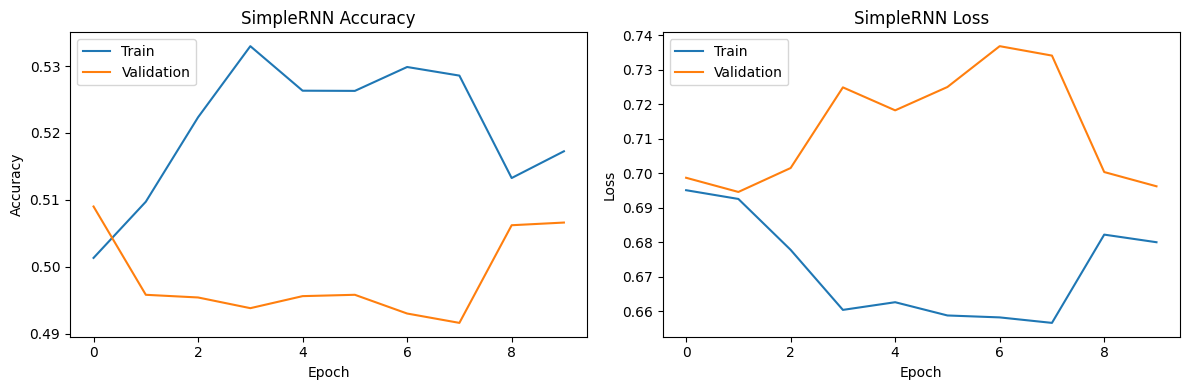

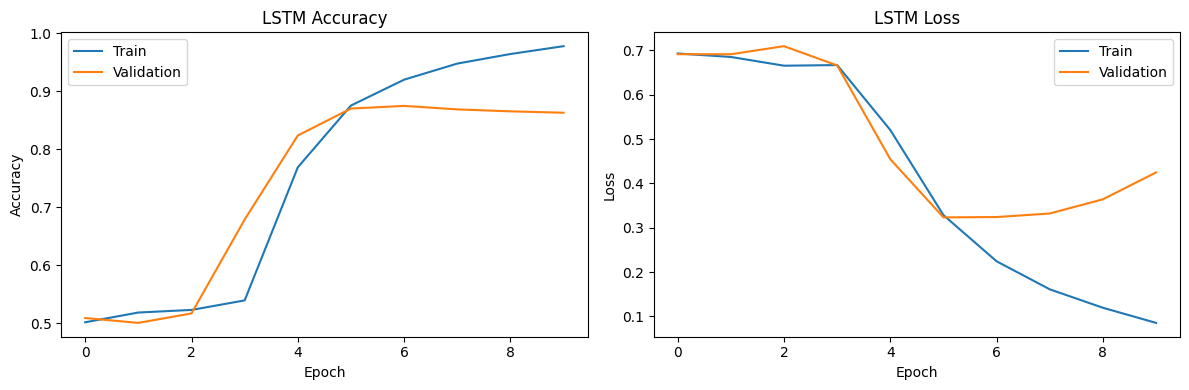

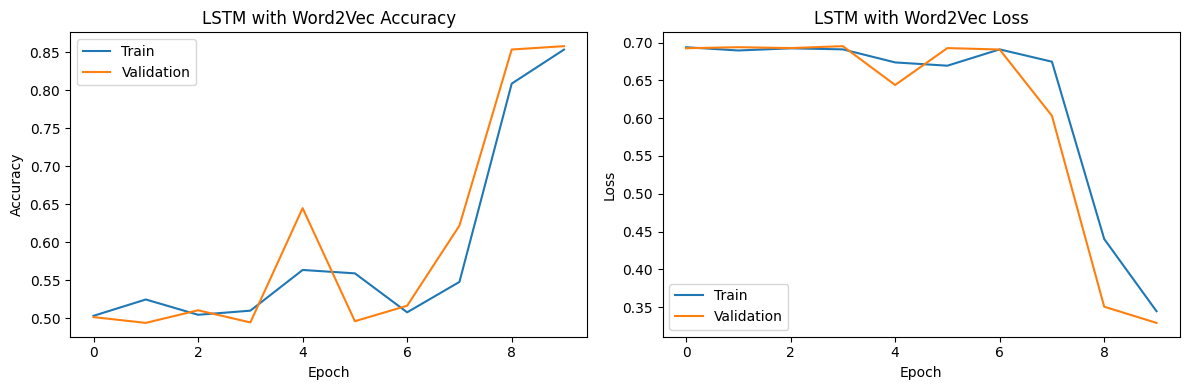

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history, title):
    plt.figure(figsize=(12, 4))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title(f'{title} Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title(f'{title} Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(history1, "SimpleRNN")
plot_history(history2, "LSTM")
plot_history(history3, "LSTM with Word2Vec")

## ** 3.3 Model Training and Evaluation**

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Common compilation settings
def compile_model(model):
    model.compile(
        loss='binary_crossentropy',
        optimizer=Adam(learning_rate=0.001),
        metrics=['accuracy']
    )

# Early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

# Compile all models
compile_model(model1)
compile_model(model2)
compile_model(model3)

### **Train Model 1 (SimpleRNN)**

In [ ]:

history1 = model1.fit(
    X_train_pad, y_train,
    validation_data=(X_val_pad, y_val),
    epochs=20,  # Set high, early stopping will intervene
    batch_size=64,
    callbacks=[early_stopping],
    verbose=1
)


Epoch 1/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.5159 - loss: 0.6805 - val_accuracy: 0.5078 - val_loss: 0.6954
Epoch 2/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 18s 28ms/step - accuracy: 0.5265 - loss: 0.6779 - val_accuracy: 0.4974 - val_loss: 0.7045
Epoch 3/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.5175 - loss: 0.6799 - val_accuracy: 0.4960 - val_loss: 0.7049
Epoch 4/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.5230 - loss: 0.6718 - val_accuracy: 0.4952 - val_loss: 0.6961


### **Train Model 2 (LSTM)**

In [ ]:

history2 = model2.fit(
    X_train_pad, y_train,
    validation_data=(X_val_pad, y_val),
    epochs=20,
    batch_size=64,
    callbacks=[early_stopping],
    verbose=1
)



Epoch 1/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - accuracy: 0.9847 - loss: 0.0655 - val_accuracy: 0.8536 - val_loss: 0.4922
Epoch 2/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.9881 - loss: 0.0557 - val_accuracy: 0.8638 - val_loss: 0.4738
Epoch 3/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.9900 - loss: 0.0476 - val_accuracy: 0.8710 - val_loss: 0.5201
Epoch 4/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.9923 - loss: 0.0380 - val_accuracy: 0.8710 - val_loss: 0.5218
Epoch 5/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.9924 - loss: 0.0390 - val_accuracy: 0.8656 - val_loss: 0.5790


### **Train Model 3 (LSTM + Word2Vec)**

In [ ]:

history3 = model3.fit(
    X_train_pad, y_train,
    validation_data=(X_val_pad, y_val),
    epochs=20,
    batch_size=64,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.8611 - loss: 0.3306 - val_accuracy: 0.8554 - val_loss: 0.3349
Epoch 2/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.8763 - loss: 0.3023 - val_accuracy: 0.8552 - val_loss: 0.3223
Epoch 3/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.8835 - loss: 0.2840 - val_accuracy: 0.8766 - val_loss: 0.2942
Epoch 4/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.8908 - loss: 0.2638 - val_accuracy: 0.8748 - val_loss: 0.3002
Epoch 5/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.8961 - loss: 0.2589 - val_accuracy: 0.8790 - val_loss: 0.2895
Epoch 6/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.8986 - loss: 0.2491 - val_accuracy: 0.8778 - val_loss: 0.2876
Epoch 7/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.9090 - loss: 0.2326 - val_accuracy: 0.8776 - val_loss: 0.2906
Epoch 8/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.9125 - loss: 0.2201 - val_

**EVALUATION**

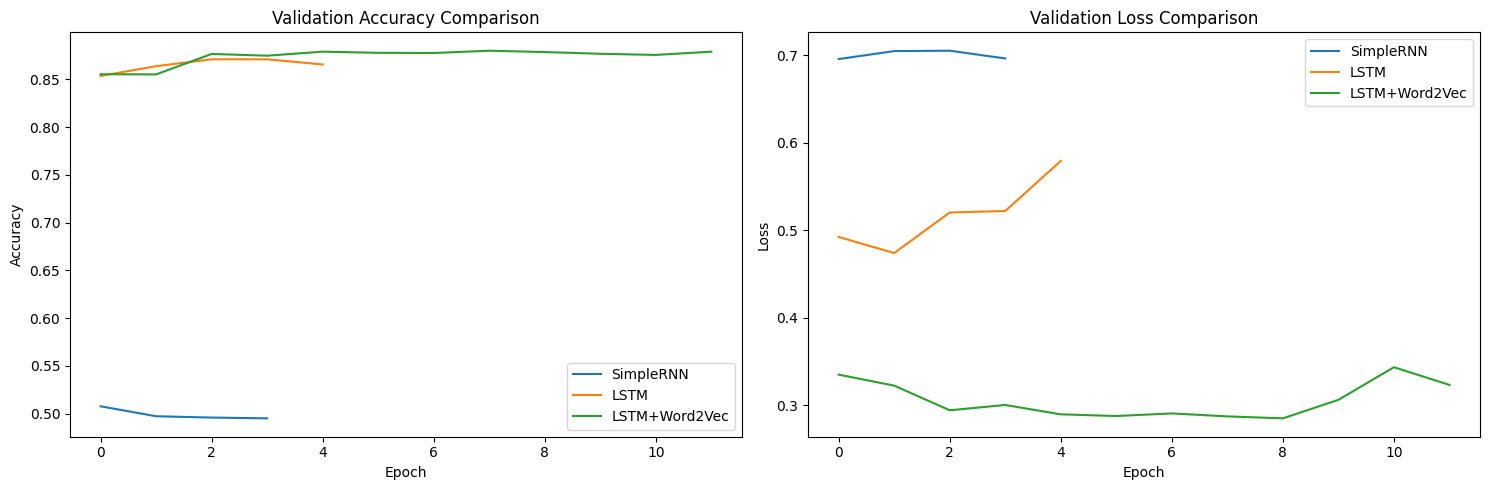

In [ ]:
import matplotlib.pyplot as plt

def plot_history(histories, model_names):
    plt.figure(figsize=(15, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    for history, name in zip(histories, model_names):
        plt.plot(history.history['val_accuracy'], label=name)
    plt.title('Validation Accuracy Comparison')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    for history, name in zip(histories, model_names):
        plt.plot(history.history['val_loss'], label=name)
    plt.title('Validation Loss Comparison')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history([history1, history2, history3],
             ['SimpleRNN', 'LSTM', 'LSTM+Word2Vec'])

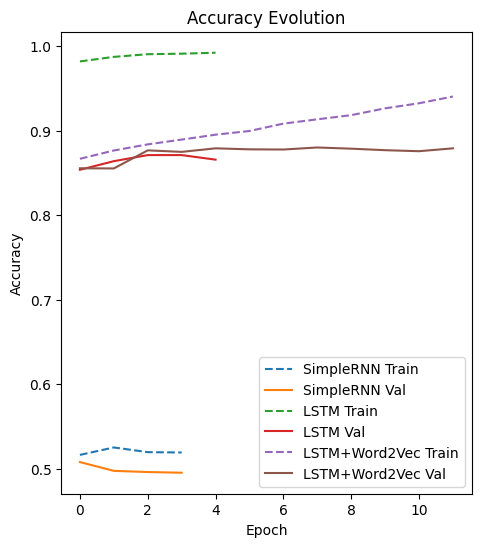

In [ ]:
plt.figure(figsize=(18, 6))

# Accuracy Comparison
plt.subplot(1, 3, 1)
for history, name in zip([history1, history2, history3], ['SimpleRNN', 'LSTM', 'LSTM+Word2Vec']):
    plt.plot(history.history['accuracy'], '--', label=f'{name} Train')
    plt.plot(history.history['val_accuracy'], '-', label=f'{name} Val')
plt.title('Accuracy Evolution')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

In [ ]:
import pandas as pd

metrics = []
for name, history in zip(['SimpleRNN', 'LSTM', 'Word2Vec'], [history1, history2, history3]):
    metrics.append({
        'Model': name,
        'Max Val Accuracy': f"{max(history.history['val_accuracy']):.4f}",
        'Final Val Accuracy': f"{history.history['val_accuracy'][-1]:.4f}",
        'Epochs to Converge': np.argmax(history.history['val_accuracy']) + 1
    })

pd.DataFrame(metrics).style.background_gradient(cmap='Blues')

,Model,Max Val Accuracy,Final Val Accuracy,Epochs to Converge
0,SimpleRNN,0.5078,0.4952,1
1,LSTM,0.8710,0.8656,3
2,Word2Vec,0.8800,0.8790,8


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


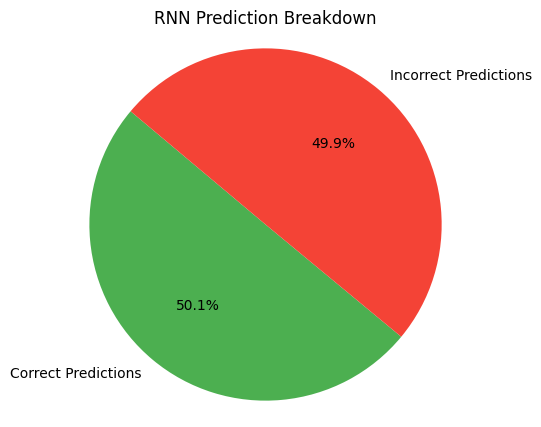

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


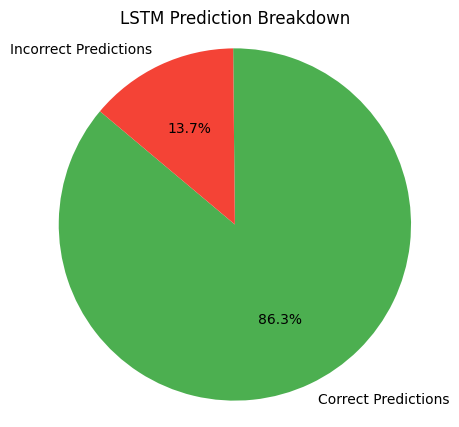

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


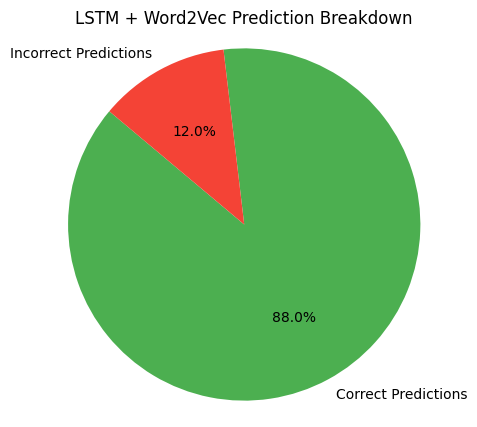

In [ ]:
def plot_prediction_pie(y_true, y_pred_classes, model_name):
    correct = np.sum(y_true == y_pred_classes)
    incorrect = np.sum(y_true != y_pred_classes)

    labels = ['Correct Predictions', 'Incorrect Predictions']
    sizes = [correct, incorrect]
    colors = ['#4CAF50', '#F44336']

    plt.figure(figsize=(5, 5))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
    plt.title(f'{model_name} Prediction Breakdown')
    plt.axis('equal')
    plt.show()

  # Predict using Model 1 (Simple RNN)
y_pred1 = (model1.predict(X_test_pad) > 0.5).astype(int).flatten()
plot_prediction_pie(y_test, y_pred1, "RNN")

# Predict using Model 2 (LSTM)
y_pred2 = (model2.predict(X_test_pad) > 0.5).astype(int).flatten()
plot_prediction_pie(y_test, y_pred2, "LSTM")

# Predict using Model 3 (LSTM + Word2Vec)
y_pred3 = (model3.predict(X_test_pad) > 0.5).astype(int).flatten()
plot_prediction_pie(y_test, y_pred3, "LSTM + Word2Vec")



SimpleRNN Test Accuracy: 0.5011
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


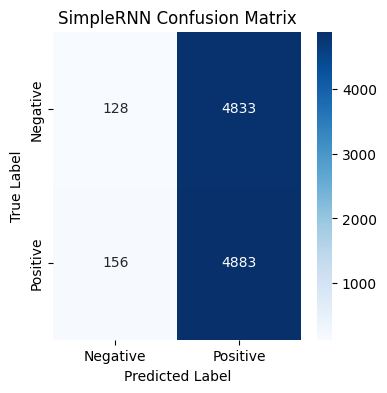


              precision    recall  f1-score   support

    Negative       0.45      0.03      0.05      4961
    Positive       0.50      0.97      0.66      5039

    accuracy                           0.50     10000
   macro avg       0.48      0.50      0.36     10000
weighted avg       0.48      0.50      0.36     10000


LSTM Test Accuracy: 0.8627
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


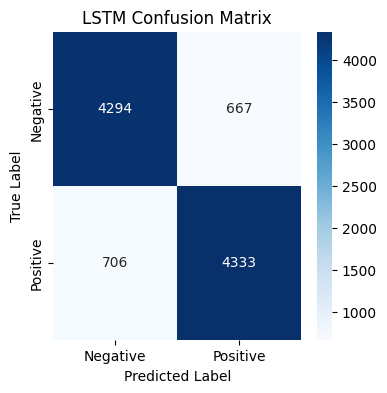


              precision    recall  f1-score   support

    Negative       0.86      0.87      0.86      4961
    Positive       0.87      0.86      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000


LSTM+Word2Vec Test Accuracy: 0.8799
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


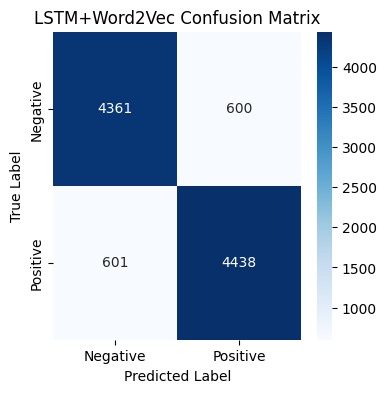


              precision    recall  f1-score   support

    Negative       0.88      0.88      0.88      4961
    Positive       0.88      0.88      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

def evaluate_model(model, X_test, y_test, model_name):
    # Accuracy
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"\n{model_name} Test Accuracy: {accuracy:.4f}")

    # Predictions
    y_pred = (model.predict(X_test) > 0.5).astype(int)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'])
    plt.title(f'{model_name} Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    # Classification Report
    print(f"\n{classification_report(y_test, y_pred, target_names=['Negative', 'Positive'])}")
    return accuracy

# Evaluate all models
acc1 = evaluate_model(model1, X_test_pad, y_test, "SimpleRNN")
acc2 = evaluate_model(model2, X_test_pad, y_test, "LSTM")
acc3 = evaluate_model(model3, X_test_pad, y_test, "LSTM+Word2Vec")

In [ ]:
# Summary table
import pandas as pd

results = pd.DataFrame({
    'Model': ['SimpleRNN', 'LSTM', 'LSTM+Word2Vec'],
    'Test Accuracy': [acc1, acc2, acc3],
    'Training Epochs': [
        len(history1.history['loss']),
        len(history2.history['loss']),
        len(history3.history['loss'])
    ],
    'Final Val Accuracy': [
        history1.history['val_accuracy'][-1],
        history2.history['val_accuracy'][-1],
        history3.history['val_accuracy'][-1]
    ]
})

print("\nModel Performance Comparison:")
print(results.sort_values('Test Accuracy', ascending=False))


Model Performance Comparison:
           Model  Test Accuracy  Training Epochs  Final Val Accuracy
2  LSTM+Word2Vec         0.8799               12              0.8790
1           LSTM         0.8627                5              0.8656
0      SimpleRNN         0.5011                4              0.4952


## **3.4 GUI for Real Time Prediction:**

In [ ]:
!pip install gradio  # Install Gradio if not already present

import gradio as gr
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Load your best model (assuming model3 is LSTM+Word2Vec)
best_model = model3

def predict_sentiment(text):
    """Preprocess input text and predict sentiment"""
    # 1. Clean the text (use the same function from training)
    cleaned_text = clean_text(text)

    # 2. Convert to sequence
    sequence = tokenizer.texts_to_sequences([cleaned_text])

    # 3. Pad the sequence
    padded_sequence = pad_sequences(sequence, maxlen=max_len, padding='post', truncating='post')

    # 4. Predict
    prediction = best_model.predict(padded_sequence)[0][0]

    # 5. Convert to label
    sentiment = "Positive" if prediction > 0.5 else "Negative"
    confidence = prediction if sentiment == "Positive" else 1 - prediction

    return f"{sentiment} ({(confidence*100):.1f}% confident)"

# Create Gradio interface
interface = gr.Interface(
    fn=predict_sentiment,
    inputs=gr.Textbox(lines=3, placeholder="Enter your movie review here..."),
    outputs="text",
    title="Movie Review Sentiment Analysis",
    description="Predicts whether a movie review is positive or negative using LSTM with Word2Vec embeddings.",
    examples=[
        ["This movie was fantastic! The acting was superb."],
        ["Terrible plot and bad acting. Would not recommend."]
    ]
)

# Launch in Colab
interface.launch(debug=True)  # Set debug=False for public links

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://d63a7924cb492e0507.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://d63a7924cb492e0507.gradio.live


In [ ]:
# Save in native format
model1.save("model_rnn.keras")
print("✅ Model 1 saved as model_rnn.keras")
model2.save("model_lstm.keras")
print("✅ Model 2 saved as model_rnn.keras")
model3.save("model_lstm_word2vec.keras")
print("✅ Model 3 saved as model_rnn.keras")

✅ Model 1 saved as model_rnn.keras
✅ Model 2 saved as model_rnn.keras
✅ Model 3 saved as model_rnn.keras


In [ ]:
from tensorflow.keras.models import load_model

loaded_model1 = load_model("model_rnn.keras")
loaded_model2 = load_model("model_lstm.keras")
loaded_model3 = load_model("model_lstm_word2vec.keras")